# Caminhadas aleatórias em uma dimensão

**Definição**: Um cadeia de Markov cujo espaço de estados é dado por inteiros $i = 0, \pm 1, \pm 2, \ldots$ é uma caminha aleatória com matriz de probabilidade de transição:
$$
P = 
\begin{bmatrix}
r_0   &p_0  &0 &0 &0 &\ldots \\ 
q_1   &r_1  &p_1 &0 &0 &\ldots \\ 
0   &q_2  &r_2 &p_2 &0 &\ldots \\ 
\ldots   &\ldots  &\ldots &\ldots &\ldots &\ldots \\ 
0   &\ldots  &q_i &r_i &p_i &\ldots \\ 
\ldots   &\ldots  &\ldots &\ldots &\ldots &\ldots \\ 
\end{bmatrix}
$$

<img src="markov1.png" width="300">

Usando análise do primeiro passo, podemos calcular a probabilidade de sair de um estado e chegar em outro, bem como o tempo necessário para essa tarefa.

Vamos considerar o caso em que há um número finito de estados $S=\{0,1,\ldots,N\}$ sendo os estados $0$ e $N$ absorventes, isto é, $P_{00} = P_{NN} = 1$. Nesse caso, a cadeia Markov é dada pela figura abaixo.

<img src="markov2.png" width="500">

Essa cadeia representa o problema da ruína da apostador: Considere um apostador que a cada jogada ganha uma ficha com probabilidade $p$ e perde com probabilidade $(1-p)$. Dado que o apostador iniciou com $i$ fichas, qual é a probabilidade de ruína, ou seja, perder todas as fichas?

Resolvendo esse problema, podemos mostrar que a probabilidade de ruína é dada por:
$$
P(X_T = 0|X_0 = i) = 
\begin{cases} 
1 - \frac{1 - (q/p)^i}{1 - (q/p)^N} \quad p\neq q\\ 
\frac{i}{N} \quad p = q.
\end{cases}
$$
sendo $p$ a probabilidade de ganhar uma partida e $q = 1-p$ a probabilidade de perder uma partida.

Podemos simular esse problema.

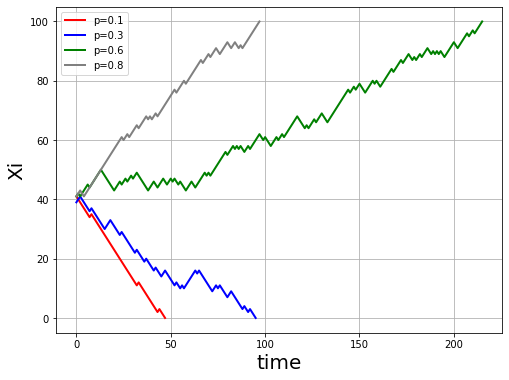

In [89]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
vp = [0.1, 0.3, 0.6, 0.8]
colors = ['red', 'blue', 'green', 'gray', 'magenta']
plt.figure(figsize=(8,6))
aux = 0
for p in vp:
    i = 40
    t = 0
    vt = []
    vi = []
    while((i > 0) and (i < N)):
        if(np.random.uniform() < p):
            i = i + 1
        else:
            i = i - 1
        #print("t:",t," i:", i)
        vi.append(i)
        vt.append(t)
        t = t + 1
    plt.plot(vt, vi, linestyle='-', color=colors[aux], linewidth=2, label = 'p='+str(p))
    plt.xlabel("time", fontsize=20)
    plt.ylabel("Xi", fontsize=20)
    aux = aux + 1
plt.legend()
plt.grid(True)
plt.show(True) 

/Users/franciscoaparecidorodrigues/Anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars
/Users/franciscoaparecidorodrigues/Anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


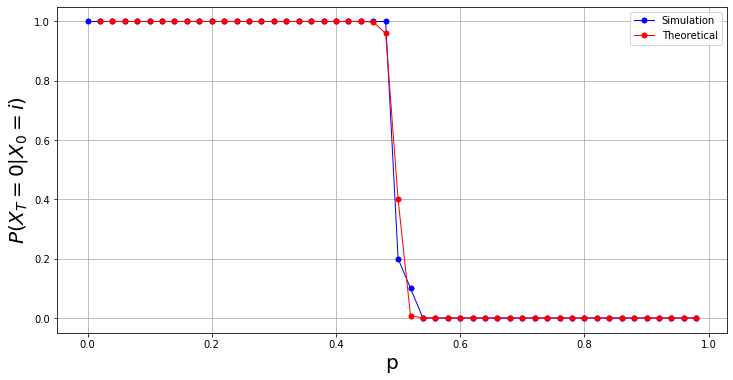

In [90]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
Ns = 10
i0 = 60
vp = np.arange(0,1,0.02)
vd = []
for p in vp:
    nwins = 0
    for s in np.arange(0,Ns):
        i = i0
        while((i > 0) and (i < N)):
            if(np.random.uniform() < p):
                i = i + 1
            else:
                i = i - 1
        if(i == N):
            nwins = nwins + 1
    vd.append(1-nwins/Ns)
plt.figure(figsize=(12,6))

plt.plot(vp, vd, '-o', color='blue', linewidth=1, markersize=5, markerfacecolor='blue',label='Simulation')
#Theoretical result
vR = []
i = i0
for p in vp:
    if(p != 0.5):
        pw = (1-((1-p)/p)**i)/(1 - ((1-p)/p)**N)
    else:
        pw = i/N
    vR.append(1 - pw)
plt.plot(vp, vR, '-o', color='red', linewidth=1, markersize=5,markerfacecolor='red', label='Theoretical')

plt.xlabel("p", fontsize=20)
plt.ylabel(r'$P(X_T = 0|X_0=i)$', fontsize=20)
plt.legend()
plt.grid(True)
plt.show(True) 